# Regularized Models


## Introduction

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the model's cost function.
This penalty discourages overly complex models that may fit the training data too closely.

## Ridge Regression


Ridge regression, also known as Tikhonov regularization, adds a penalty term equivalent to the square of the magnitude of coefficients to the cost function.

$$
\text{Cost function} = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
$$

where:
- $\text{RSS}$ is the residual sum of squares
- $\lambda$ is the regularization parameter
- $\beta_j$ are the coefficients

Ridge regression is useful when there is multicollinearity in the data.

### Limitation of Ridge Regression
Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it.Hence, this model is not good for feature reduction.

## Lasso Regression

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, adds a penalty term equivalent to the absolute value of the magnitude of coefficients to the cost function.

$$
\text{Cost function} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Lasso regression can be used for feature selection as it tends to shrink the coefficients of less important features to exactly zero.

### Limitation of Lasso Regression
- Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
- If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

---

Let's demonstrate Ridge and Lasso regression with a simple example using the `sklearn` library.

In [2]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Ridge and Lasso regression models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)


Ridge Regression MSE: 105.78604284136125
Lasso Regression MSE: 107.66424214462873


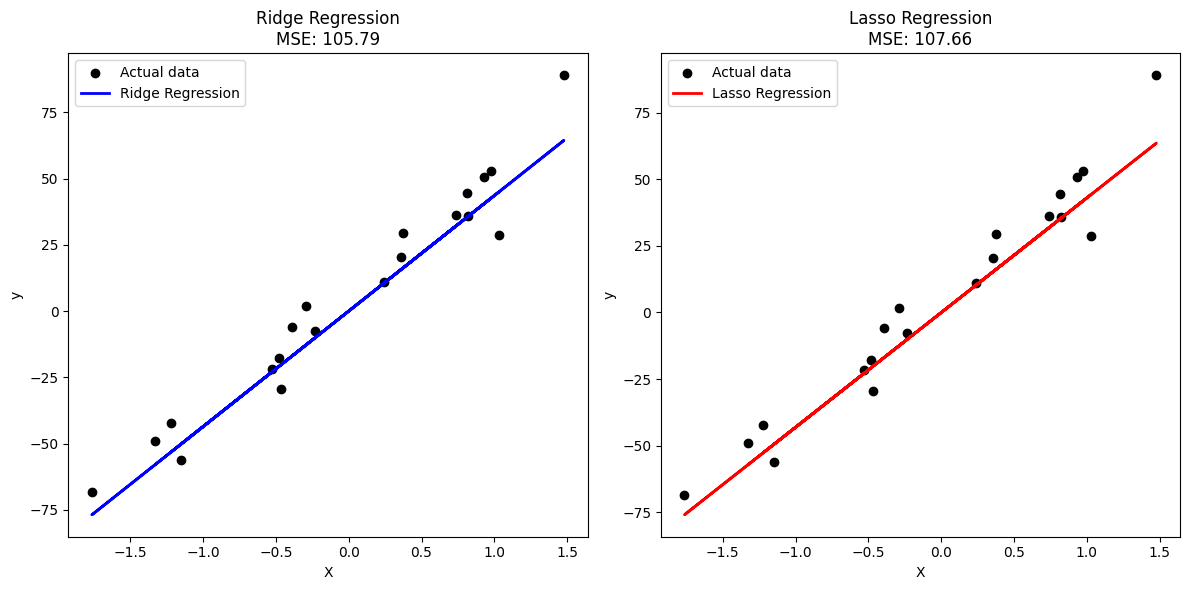

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Visual representation
plt.figure(figsize=(12, 6))

# Plotting Ridge Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_ridge, color='blue', linewidth=2, label='Ridge Regression')
plt.title(f'Ridge Regression\nMSE: {mse_ridge:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plotting Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2, label='Lasso Regression')
plt.title(f'Lasso Regression\nMSE: {mse_lasso:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
